In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def read_epi_data(fileName, popData):
    epiOData = np.genfromtxt(fileName, delimiter=',', skip_header= 0)
    start= 1
    requireNum= 60
    print(epiOData.shape)
    epiOData = epiOData[start:start+requireNum,1:]
    epiODataNew= np.zeros((requireNum,epiOData.shape[1]))
    epiODataNew[requireNum-epiOData.shape[0]:, :]= epiOData.copy()
    epiOData = epiODataNew
    epiData= epiOData.copy()/popData[None, :]
    epiNewData = epiData.copy()
    epiNewData[1:, :] = epiNewData[1:, :]-epiNewData[:-1, :]
    # print(np.sum(epiNewData<0))
    epiNewData[epiNewData<0]= 0
    sumEpiData= np.sum(epiData, axis= 0)
    ranked_indices = np.argsort(sumEpiData)
    return epiOData, epiData, ranked_indices
Epi= "covid" # sars, covid, H1N1
# Read the CSV file into a NumPy array
popData = np.genfromtxt('populations.csv', delimiter=',', skip_header= 0)
file_path = 'Country_Population_final.csv'
data = pd.read_csv(file_path)
popName= data["Country"].tolist()
epiODataSars, epiDataSars, ranked_indices_Sars= read_epi_data('infected_numbers_sars.csv', popData)
epiODataH1N1, epiDataH1N1, ranked_indices_H1N1= read_epi_data('infected_numbers_H1N1.csv', popData)
epiODataCovid, epiDataCovid, ranked_indices_Covid= read_epi_data('infected_numbers_covid.csv', popData)
ranked_pop= np.argsort(popData)

C:\Users\30678\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


(97, 235)
(51, 235)
(159, 235)


90


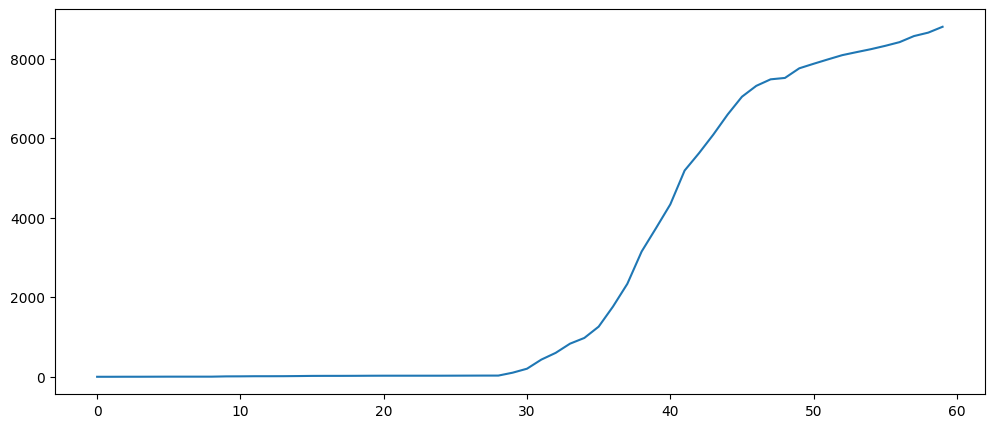

In [2]:
lastUsed= -5 #84
usedIdx= set(ranked_indices_Covid[-80:]).union(set(ranked_indices_Sars[-5:])).union(set(ranked_indices_H1N1[-21:]))
usedIdx
print(len(usedIdx))
plt.figure(figsize=(12, 5))
plt.plot(epiODataCovid[: , ranked_indices_Covid[lastUsed]])

In [4]:
print(ranked_indices_Covid[-lastUsed: ])
testEpiData= np.concatenate([epiODataSars[:, np.array(list(usedIdx))], 
                             epiODataH1N1[:, np.array(list(usedIdx))], 
                             epiODataCovid[:, np.array(list(usedIdx))] ])
print(testEpiData.shape)
testPopData= popData[np.array(list(usedIdx))]
print(testPopData.shape)
np.savetxt(f'testData/test_data.csv', testEpiData, delimiter=',', fmt='%d')
np.savetxt(f'testData/test_pop.csv', testPopData, delimiter=',', fmt='%d')
np.savetxt(f'testData/test_pop_inx.csv', ranked_indices_Covid[np.array(list(usedIdx))], delimiter=',', fmt='%d')

[143 142 141 140 138 125 124 123 122 121 120 119 118 232 115 113 101  97
  96  86  81  73  70 166 167 168 169 231 230 229 228 227 224 223 222 221
 220 218 211 209  66 208 201 195 194 193 187 186 178 176 175 174 172 171
 170 205  64 233  31  54  55  49  48  44  43  42  39  37  34  25  21  20
  53  19  58  18  75  10  17  46  51  45   0  52 217  72 111  65  67   9
  74  41 107  69 192  63 110  33   5 207 189  22   8  80 196  56  59  35
  32  62   7 103 184 117  40 188 181 226  12  71 127  47 112 225 202 106
 162 157 104   6 183  60 212 180 200 155 156 136  94  30  61 149 191 150
  36   4 151 190  68   3 197 158  38  11 102 210 114 131 182 105 160 126
 199 137 185 129  99  83 163 177  28 165  24 179 173  95 146 154  98 164
 135 215 109  77 152  92 219 147  91 161 100   1 108 134  76 133  79 216
 203 198 213 214  78  50  82  87 132  90  16  23  88 206  85  13 204  14
  29  15 139  89 128 130  57  27 148  26  93  84   2]
(180, 90)
(90,)
